### Actividad 2.1 (Regresión Lineal Simple y Múltiple)

Ivanna Maldonado Cervantes 

Paula Simonetta Madrid Pérez

Ania Diaz Gonzalez 

Miranda Eugenia Colorado Arróniz


In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [459]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')

print("\nPrimeras filas del dataframe:")
df


Primeras filas del dataframe:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1,412,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1,400,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1,403,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7,400,17.500000


Revisamos las columnas y sus tipos de datos

In [460]:
print("\nNombre de las columnas y sus tipos de datos:")
df.dtypes


Nombre de las columnas y sus tipos de datos:


TaxonName                            object
TaxonCode                            object
SamplingOperations_code              object
CodeSite_SamplingOperations          object
Date_SamplingOperation               object
Abundance_nbcell                      int64
TotalAbundance_SamplingOperation      int64
Abundance_pm                        float64
dtype: object

Examinar las frecuencias de las variables categóricas "TaxonName", "TaxonCode", "SamplingOperations_code", "CodeSite_SamplingOperations" y "Date_SamplingOperation"

In [461]:
#Frecuencias de mayor a menor para cada una
print("\nFrecuencias de TaxonName:")
print(df['TaxonName'].value_counts())
print()

print("\nFrecuencias de TaxonCode:")
print(df['TaxonCode'].value_counts())
print()

print("\nFrecuencias de SamplingOperations_code:")
print(df['SamplingOperations_code'].value_counts())
print()

print("\nFrecuencias de CodeSite_SamplingOperations:")
print(df['CodeSite_SamplingOperations'].value_counts())
print()

print("\nFrecuencias de Date_SamplingOperation:")
print(df['Date_SamplingOperation'].value_counts())
print()


Frecuencias de TaxonName:
TaxonName
Achnanthes minutissima      43691
Amphora pediculus           39209
Cocconeis euglypta          38570
Sellaphora nigri            38039
Navicula cryptotenella      37723
                            ...  
Encyonopsis neoamphioxys        1
Encyonopsis recta               1
Lindavia bodanica               1
Leptocylindrus minimus          1
Eunotia perpusilla              1
Name: count, Length: 2292, dtype: int64


Frecuencias de TaxonCode:
TaxonCode
Achmi02    43691
Amppe02    39209
Coceu01    38570
Selni01    38039
Navcr09    37723
           ...  
Encne03        1
Encre01        1
Linbo01        1
Lepmi01        1
Eunpe02        1
Name: count, Length: 2292, dtype: int64


Frecuencias de SamplingOperations_code:
SamplingOperations_code
S05051000_20080722    97
S05119000_20160627    97
S05068700_20070904    94
S04103550_20150811    92
S04215520_20200702    92
                      ..
S05192040_20170914     2
S05224100_20080821     2
S05221600_20080826

Convertirlas a númericas según su frecuencia

In [462]:
df_numeric = df.copy()

variables_categoricas = ['TaxonName', 'TaxonCode', 'SamplingOperations_code', 
                        'CodeSite_SamplingOperations', 'Date_SamplingOperation']

for variable in variables_categoricas:    
    frecuencias = df[variable].value_counts() #Contamos las frecuencias
    
    mapeo = {} 
    for i, valor in enumerate(frecuencias.index): #Mapeamos el valor de la más frecuente a 1, y asi sucesivamente
        mapeo[valor] = i + 1
    df_numeric[variable] = df[variable].map(mapeo) #Aplicamos el mapeo a la columna

Verificamos los tipos del datos del df convertido

In [463]:
print("\nTipos de datos en el dataframe convertido:")
print(df_numeric.dtypes)


Tipos de datos en el dataframe convertido:
TaxonName                             int64
TaxonCode                             int64
SamplingOperations_code               int64
CodeSite_SamplingOperations           int64
Date_SamplingOperation                int64
Abundance_nbcell                      int64
TotalAbundance_SamplingOperation      int64
Abundance_pm                        float64
dtype: object


#### **Regresión lineal simple**

Calculamos las correlaciones entre todas las variables para identificar los 5 pares con mayor correlación

In [464]:
print("\nMatriz de correlación:")
Corr_Factors = df_numeric.corr()
Corr_Factors


Matriz de correlación:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
TaxonName,1.000000,1.000000,-0.107305,-0.011925,0.010478,-0.131807,0.010570,-0.131876
TaxonCode,1.000000,1.000000,-0.107305,-0.011925,0.010478,-0.131807,0.010570,-0.131876
SamplingOperations_code,-0.107305,-0.107305,1.000000,0.240210,0.071392,0.156950,-0.025725,0.157256
CodeSite_SamplingOperations,-0.011925,-0.011925,0.240210,1.000000,0.034921,0.041136,0.033326,0.040755
Date_SamplingOperation,0.010478,0.010478,0.071392,0.034921,1.000000,0.013898,0.037350,0.013482
Abundance_nbcell,-0.131807,-0.131807,0.156950,0.041136,0.013898,1.000000,0.006612,0.999606
TotalAbundance_SamplingOperation,0.010570,0.010570,-0.025725,0.033326,0.037350,0.006612,1.000000,-0.004262
Abundance_pm,-0.131876,-0.131876,0.157256,0.040755,0.013482,0.999606,-0.004262,1.000000


Encontramos el valor absoluto de todas las correlaciones entre las variables 

In [465]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
TaxonName,1.000000,1.000000,0.107305,0.011925,0.010478,0.131807,0.010570,0.131876
TaxonCode,1.000000,1.000000,0.107305,0.011925,0.010478,0.131807,0.010570,0.131876
SamplingOperations_code,0.107305,0.107305,1.000000,0.240210,0.071392,0.156950,0.025725,0.157256
CodeSite_SamplingOperations,0.011925,0.011925,0.240210,1.000000,0.034921,0.041136,0.033326,0.040755
Date_SamplingOperation,0.010478,0.010478,0.071392,0.034921,1.000000,0.013898,0.037350,0.013482
Abundance_nbcell,0.131807,0.131807,0.156950,0.041136,0.013898,1.000000,0.006612,0.999606
TotalAbundance_SamplingOperation,0.010570,0.010570,0.025725,0.033326,0.037350,0.006612,1.000000,0.004262
Abundance_pm,0.131876,0.131876,0.157256,0.040755,0.013482,0.999606,0.004262,1.000000


Graficamos el mapa de calor de los coeficientes de correlación

<Axes: >

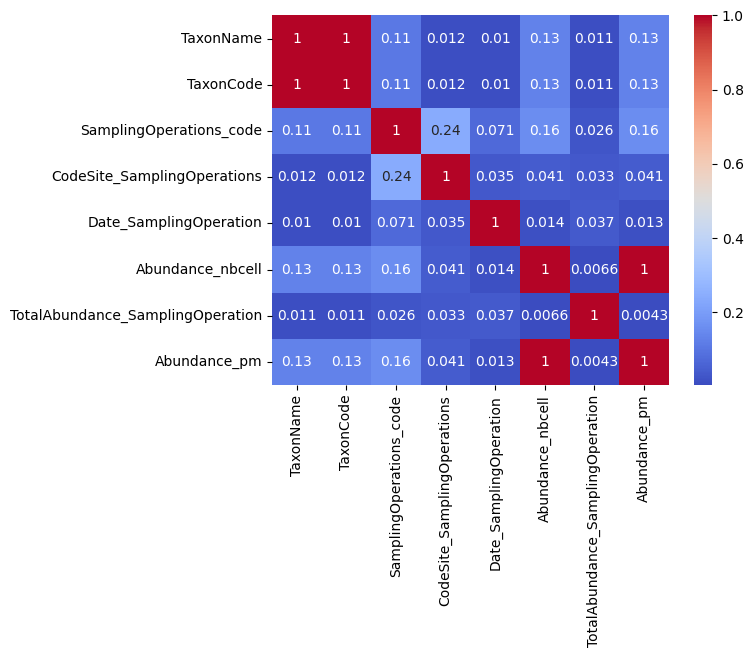

In [466]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm', annot=True)  
Heat_Map

Ajustamos el mapa de calor de los coeficientes de correlación 

<Axes: >

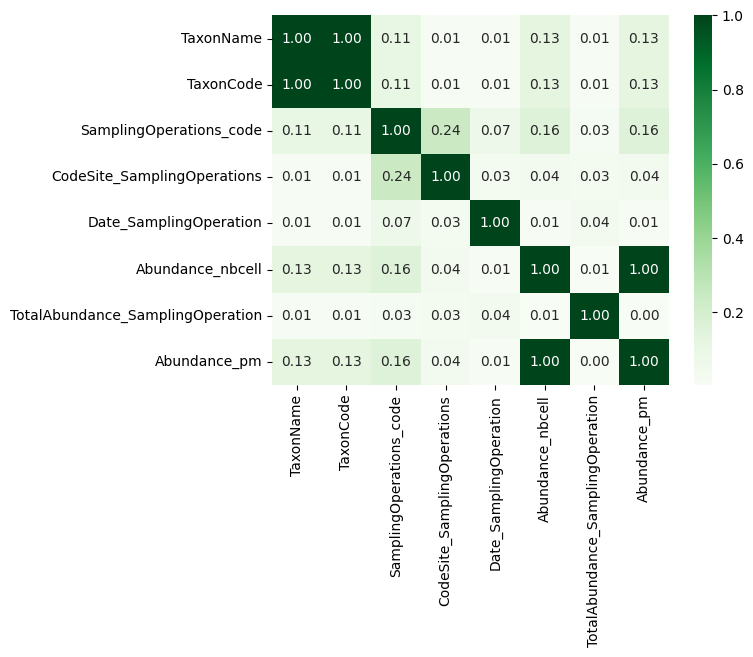

In [467]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'Greens', annot=True, fmt=".2f")  
Heat_Map

Tabla de los 5 pares:

In [468]:
# Creamos un DataFrame con los 5 pares y su interpretación
top5 = pd.DataFrame({
    'Par de Variables': [
        'TaxonName y TaxonCode',
        'Abundance_nbcell y Abundance_pm',
        'TotalAbundance_SamplingOperation y Abundance_pm',
        'TotalAbundance_SamplingOperation y Abundance_nbcell',
        'SamplingOperations_code y CodeSite_SamplingOperations'
    ],
    'Correlación': [1.00, 1.00, 1.00, 1.00, 0.24],
    'Interpretación': [
        'Correlación perfecta positiva, Ambas variables representan la misma información (especies) en diferente formato.',
        'Correlación perfecta positiva, Ambas miden abundancia de las mismas especies, solo en diferentes unidades.',
        'Correlación perfecta positiva, La abundancia total está directamente relacionada con la abundancia por muestra.',
        'Correlación perfecta positiva, Misma relación que el anterior, pero con la otra medida de abundancia.',
        'Correlación baja, Muestra una relación débil entre código de operación y sitio de muestreo.'
    ]
})
top5

,Par de Variables,Correlación,Interpretación
0,TaxonName y TaxonCode,1.00,"Correlación perfecta positiva, Ambas variables..."
1,Abundance_nbcell y Abundance_pm,1.00,"Correlación perfecta positiva, Ambas miden abu..."
2,TotalAbundance_SamplingOperation y Abundance_pm,1.00,"Correlación perfecta positiva, La abundancia t..."
3,TotalAbundance_SamplingOperation y Abundance_n...,1.00,"Correlación perfecta positiva, Misma relación ..."
4,SamplingOperations_code y CodeSite_SamplingOpe...,0.24,"Correlación baja, Muestra una relación débil e..."


#### **Regresión lineal múltiple**

*TaxonName*

In [469]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']]
Var_Dep= df_numeric['TaxonName']


In [470]:
model= LinearRegression()

In [471]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [472]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.0317946 , -0.24033951, -0.00095772]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(116.62584742904217)}

In [473]:
model.score(Vars_Indep,Var_Dep)

0.025075083314315072

In [474]:
y_pred= model.predict(X=df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']])
y_pred

array([ 79.550099  ,  87.73210246,  94.42347634, ...,  84.70327927,
       111.55663045, 113.31350874], shape=(1643872,))

In [475]:
df_numeric.insert(0, 'PrediccionesTname0', y_pred)
df_numeric

,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,94.423476,521,521,22522,1138,949,1,400,2.500000
3,111.896494,521,521,3617,6381,499,2,400,5.000000
4,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...
1643867,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,111.556630,1342,1342,669,461,245,7,400,17.500000


In [476]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
Abundance_nbcell                  -0.131807             -0.031795
Abundance_pm                      -0.131876             -0.240340
SamplingOperations_code           -0.107305             -0.000958


*TaxonCode*

In [477]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']]
Var_Dep= df_numeric['TaxonCode']

In [478]:
model= LinearRegression()

In [479]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [480]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.0317946 , -0.24033951, -0.00095772]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(116.62584742904217)}

In [481]:
model.score(Vars_Indep,Var_Dep)

0.025075083314315072

In [482]:
y_pred= model.predict(X=df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']])
y_pred

array([ 79.550099  ,  87.73210246,  94.42347634, ...,  84.70327927,
       111.55663045, 113.31350874], shape=(1643872,))

In [483]:
df_numeric.insert(0, 'PrediccionesTcode0', y_pred)
df_numeric

,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...
1643867,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [484]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
Abundance_nbcell                  -0.131807             -0.031795
Abundance_pm                      -0.131876             -0.240340
SamplingOperations_code           -0.107305             -0.000958


*SamplingOperations_code*

In [485]:
Vars_Indep= df_numeric[['CodeSite_SamplingOperations', 'Abundance_nbcell','Abundance_pm']]
Var_Dep= df_numeric['SamplingOperations_code']

In [486]:
model= LinearRegression()

In [487]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [488]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CodeSite_SamplingOperations', 'Abundance_nbcell', 'Abundance_pm'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([   1.72473048, -209.76398208,  114.52874796]),
 'rank_': 3,
 'singular_': array([2.36418747e+06, 9.42566546e+04, 9.23430283e+02]),
 'intercept_': np.float64(15079.113167577867)}

In [489]:
model.score(Vars_Indep,Var_Dep)

0.0796276680069411

In [490]:
y_pred= model.predict(X=df_numeric[['CodeSite_SamplingOperations', 'Abundance_nbcell','Abundance_pm']])
y_pred

array([19501.08892895, 16268.73680776, 17118.41434481, ...,
       15948.64037965, 16410.11913484, 18817.27387037], shape=(1643872,))

In [491]:
df_numeric.insert(0, 'PrediccionesSamplingO', y_pred)
df_numeric

,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...
1643867,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [492]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
CodeSite_SamplingOperations            0.240210              1.724730
Abundance_nbcell                       0.156950           -209.763982
Abundance_pm                           0.157256            114.528748


*CodeSite_SamplingOperations*

In [493]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'Abundance_nbcell','Abundance_pm']]
Var_Dep= df_numeric['CodeSite_SamplingOperations']

In [494]:
model= LinearRegression()

In [495]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [496]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'Abundance_nbcell', 'Abundance_pm'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 3.25945926e-02,  3.85077293e+01, -1.55455725e+01]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(1532.5389811897448)}

In [497]:
model.score(Vars_Indep,Var_Dep)

0.05797332814625955

In [498]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'Abundance_nbcell','Abundance_pm']])
y_pred

array([2641.85682284, 2494.59697159, 2266.27819408, ..., 2597.5329971 ,
       1551.85135066, 1623.38244946], shape=(1643872,))

In [499]:
df_numeric.insert(0, 'PrediccionesCodeSiteO', y_pred)
df_numeric

,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [500]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.240210              0.032595
Abundance_nbcell                   0.041136             38.507729
Abundance_pm                       0.040755            -15.545572


*Date_SamplingOperation*

In [501]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'Abundance_nbcell','CodeSite_SamplingOperations']]
Var_Dep= df_numeric['Date_SamplingOperation']

In [502]:
model= LinearRegression()

In [503]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [504]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'Abundance_nbcell',
        'CodeSite_SamplingOperations'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00205502, 0.04086034, 0.0042909 ]),
 'rank_': 3,
 'singular_': array([17408218.49826356,  2293720.30441318,    35047.84586538]),
 'intercept_': np.float64(425.82622124131564)}

In [505]:
model.score(Vars_Indep,Var_Dep)

0.0054390701069836345

In [506]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'Abundance_nbcell','CodeSite_SamplingOperations']])
y_pred

array([505.08838078, 489.29719974, 477.03328089, ..., 494.99500881,
       429.46515796, 440.72661334], shape=(1643872,))

In [507]:
df_numeric.insert(0, 'PrediccionesDateSamplingO', y_pred)
df_numeric

,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [508]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
SamplingOperations_code                0.071392              0.002055
Abundance_nbcell                       0.013898              0.040860
CodeSite_SamplingOperations            0.034921              0.004291


*Abundance_nbcell*

In [509]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'TaxonName']]
Var_Dep= df_numeric['Abundance_nbcell']

In [510]:
model= LinearRegression()

In [511]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [512]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'TaxonName'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.00029467, -0.02198636]),
 'rank_': 2,
 'singular_': array([17398799.71036601,   186641.69474616]),
 'intercept_': np.float64(8.094136105404967)}

In [513]:
model.score(Vars_Indep,Var_Dep)

0.03800428613886497

In [514]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'TaxonName']])
y_pred

array([-19.49387524, -20.71735219,   3.27584077, ..., -11.78286121,
       -21.21441871, -20.58706263], shape=(1643872,))

In [515]:
df_numeric.insert(0, 'PrediccionesAbnbcellO', y_pred)
df_numeric

,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [516]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.156950              0.000295
TaxonName                         -0.131807             -0.021986


*TotalAbundance_SamplingOperation*

In [517]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'CodeSite_SamplingOperations']]
Var_Dep= df_numeric['TotalAbundance_SamplingOperation']

In [518]:
model= LinearRegression()

In [519]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [520]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'CodeSite_SamplingOperations'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([-2.73839908e-05,  2.36031951e-04]),
 'rank_': 2,
 'singular_': array([17408217.60705897,  2293720.30218036]),
 'intercept_': np.float64(405.9778976726127)}

In [521]:
model.score(Vars_Indep,Var_Dep)

0.002318045545487535

In [522]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'CodeSite_SamplingOperations']])
y_pred

array([405.59222545, 405.32237186, 405.62975979, ..., 405.19190912,
       406.06838851, 406.4023731 ], shape=(1643872,))

In [523]:
df_numeric.insert(0, 'PrediccionesTotalAb0', y_pred)
df_numeric

,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,406.344626,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,406.197498,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,405.191909,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,406.068389,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [524]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
SamplingOperations_code               -0.025725             -0.000027
CodeSite_SamplingOperations            0.033326              0.000236


*Abundance_pm*

In [525]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'TaxonName', 'TaxonCode']]
Var_Dep= df_numeric['Abundance_pm']

In [526]:
model= LinearRegression()

In [527]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [528]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'TaxonName', 'TaxonCode'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00072733, -0.02708594, -0.02708594]),
 'rank_': 2,
 'singular_': array([1.73988114e+07, 2.63951039e+05, 1.12274072e-09]),
 'intercept_': np.float64(19.91855023003531)}

In [529]:
model.score(Vars_Indep,Var_Dep)

0.03810895412430615

In [530]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'TaxonName', 'TaxonCode']])
y_pred

array([-48.01166971, -51.03154065,   8.07591392, ..., -29.01389172,
       -52.29351819, -50.74503427], shape=(1643872,))

In [531]:
df_numeric.insert(0, 'PrediccionesAbpm0', y_pred)
df_numeric

,PrediccionesAbpm0,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-48.011670,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-51.031541,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,8.075914,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-5.674245,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2.556212,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,-52.195329,406.344626,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,-41.341395,406.197498,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,-29.013892,405.191909,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,-52.293518,406.068389,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [532]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.157256              0.000727
TaxonName                         -0.131876             -0.027086
TaxonCode                         -0.131876             -0.027086


# **3.1 Correlación no lineal**

In [533]:
df_numeric.head(5)

,PrediccionesAbpm0,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-48.011670,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-51.031541,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,8.075914,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-5.674245,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2.556212,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000


In [534]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(df_numeric)

## **TaxonName**

#### **Modelo 1 - Función cociente entre polinomios**

In [535]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['Abundance_pm']]
Var_Dep= df_numeric['TaxonName']

In [536]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [537]:
#modelo poliniomios: 
def func1(x, a, b, c):
    return ((a * x**2) + b) / (c * x**2)

In [538]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df_numeric['Abundance_pm'], df_numeric['TaxonName'])

In [539]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 747.51478099, 5444.60883631,   11.3851407 ])

In [540]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [541]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,Abundance_pm
0,66.975148
1,143.710306
2,142.172349
3,84.785877
4,142.172349
...,...
1643867,146.832130
1643868,142.172349
1643869,143.324382
1643870,67.218589


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/1703067384.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/1703067384.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con:", color= "red")


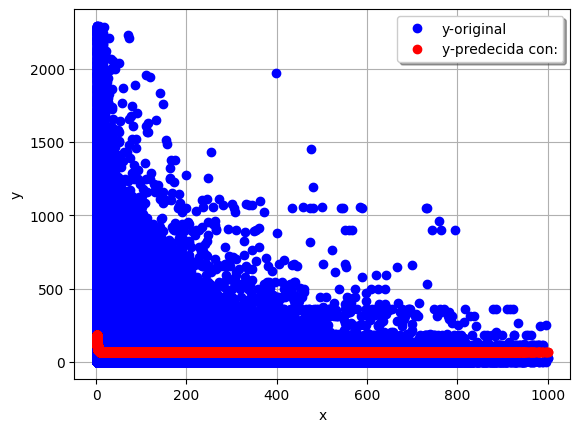

In [542]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [543]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.04642068843218039

In [544]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.21545460875131076)

#### **Modelo 2 - Función logarítmica**

In [545]:
def func2(x, a, b):
    return a * np.log(x) + b

In [546]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs= curve_fit(func2, df_numeric['Abundance_pm'], df_numeric['TaxonName'])

In [547]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-27.17483743, 153.46443379])

In [548]:
# Predicciones
y_pred2 = func2(x, *parametros2)

In [549]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,Abundance_pm
0,73.381761
1,128.834781
2,128.564382
3,109.728220
4,128.564382
...,...
1643867,129.367638
1643868,128.564382
1643869,128.767433
1643870,75.684590


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/322228218.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/322228218.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2,'bo', label="y-predecida con:", color= "red")


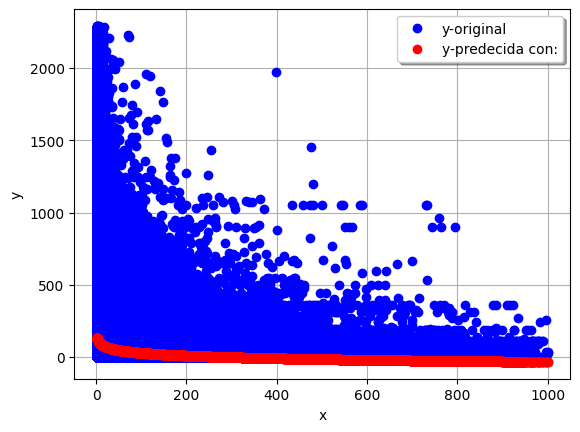

In [550]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred2,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [551]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)

R2_Modelo2_abs = abs(R2_Modelo2)
print("R² absoluto:", R2_Modelo2_abs)

R² absoluto: 0.057153994855402845


In [552]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2_abs)
R

np.float64(0.23906901692900911)

## **Taxon Code**

#### **Modelo 1 - Función cociente entre polinomios**

In [553]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['Abundance_nbcell']]
Var_Dep= df_numeric['TaxonCode']

In [554]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [555]:
#modelo poliniomios: 
def func_1(x, a, b, c):
    return ((a * x**2) + b) / (c * x**2)

In [556]:
#Ajustamos los parámetros de la función curve_fit
parametros_1, covs= curve_fit(func_1, df_numeric['Abundance_pm'], df_numeric['TaxonCode'])

In [557]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros_1

array([ 747.51478099, 5444.60883631,   11.3851407 ])

In [558]:
# Predicciones
y_pred_1 = func_1(x, *parametros_1)

In [559]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred_1

,Abundance_nbcell
0,73.129249
1,543.877654
2,543.877654
3,185.212203
4,543.877654
...,...
1643867,543.877654
1643868,543.877654
1643869,543.877654
1643870,75.416657


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/817078332.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/817078332.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_1,'bo', label="y-predecida con:", color= "red")


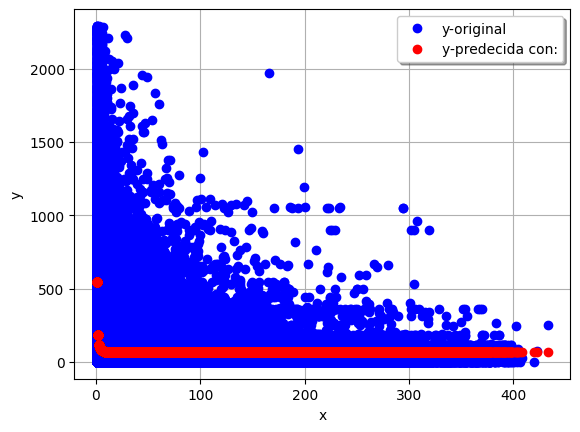

In [560]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_1,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [561]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo_1 = r2_score(y, y_pred_1) 
R2_Modelo_1 

-1.8703905510901642

In [562]:
#Calculamos el coeficiente de correlación del modelo
R1 = np.sqrt(R2_Modelo_1)
R1

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/2953480989.py:2: RuntimeWarning: invalid value encountered in sqrt
  R1 = np.sqrt(R2_Modelo_1)


np.float64(nan)

#### **Modelo 2 - Logarítmica**

In [563]:
def func_2(x, a, b):
    return a * np.log(x) + b

In [564]:
#Ajustamos los parámetros de la función curve_fit
parametros_2, covs= curve_fit(func_2, df_numeric['Abundance_pm'], df_numeric['TaxonCode'])

In [565]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros_2

array([-27.17483743, 153.46443379])

In [566]:
# Predicciones
y_pred_2 = func_2(x, *parametros_2)

In [567]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred_2

,Abundance_nbcell
0,96.955948
1,153.464434
2,153.464434
3,134.628272
4,153.464434
...,...
1643867,153.464434
1643868,153.464434
1643869,153.464434
1643870,100.584642


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/4227682154.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/4227682154.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_2,'bo', label="y-predecida con:", color= "red")


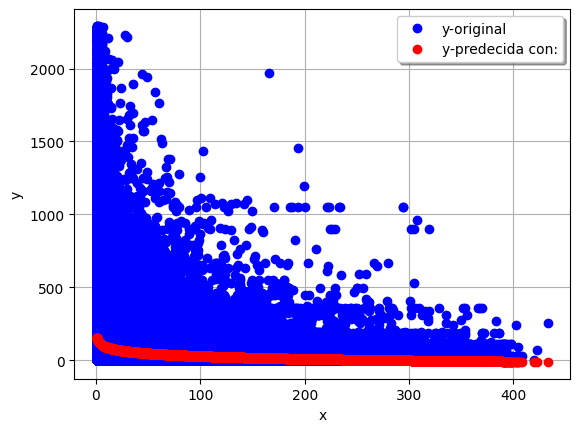

In [568]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_2,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [569]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo_2 = r2_score(y, y_pred_2) 
R2_Modelo_2

0.029048652308944045

In [570]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo_2)
R

np.float64(0.1704366518943154)

## **Sampling Operations Code**

#### **Modelo 1**

In [571]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['CodeSite_SamplingOperations']]
Var_Dep= df_numeric['SamplingOperations_code']

In [572]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [573]:
def func_s(x, a, b, c):
    return (a*(x**2)) + (b*x) + c 

In [574]:
#Ajustamos los parámetros de la función curve_fit
parametros_s, covs= curve_fit(func_s, df_numeric['CodeSite_SamplingOperations'], df_numeric['SamplingOperations_code'])

In [575]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros_s

array([-3.65524107e-04,  4.09248103e+00,  1.37625191e+04])

In [576]:
# Convertir la columna a numérica antes de usarla en la función
y_pred_s = func_s(x, *parametros_s)

In [577]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred_s

,CodeSite_SamplingOperations
0,21173.806419
1,16257.342653
2,17946.392719
3,24993.536655
4,17877.760012
...,...
1643867,19511.311383
1643868,22262.967239
1643869,15571.471314
1643870,15571.471314


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/4153698853.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/4153698853.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_s,'bo', label="y-predecida con", color= "red")


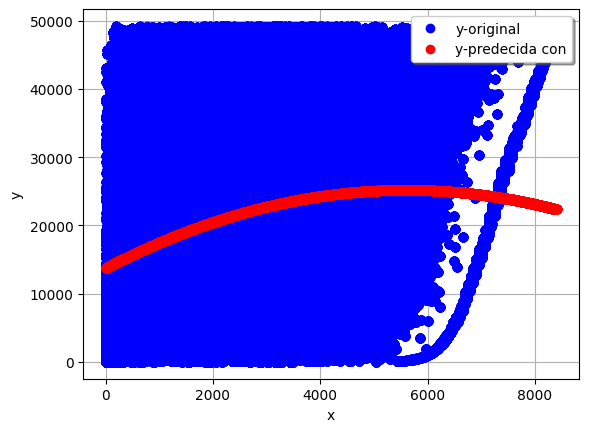

In [578]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_s,'bo', label="y-predecida con", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [579]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo_s = r2_score(y, y_pred_s) 
R2_Modelo_s

0.06958333985244647

In [580]:
R2 = np.sqrt(abs(R2_Modelo_s))
R2

np.float64(0.26378654221253683)

#### **Modelo 2**

In [581]:
def func_log(x, a, b):
    return (a*np.log(x)) + b

In [582]:
parametros_log, covs= curve_fit(func_log, df_numeric['CodeSite_SamplingOperations'], df_numeric['SamplingOperations_code'])
parametros_log

array([ 3284.77159849, -3874.5394911 ])

In [583]:
y_pred_log = func_log(x, *parametros_log)
y_pred_log

,CodeSite_SamplingOperations
0,21511.541164
1,17385.639793
2,19240.488955
3,24903.607606
4,19179.307405
...,...
1643867,20454.813554
1643868,22144.703692
1643869,16272.272203
1643870,16272.272203


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3278846962.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3278846962.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_log,'bo', label="y-predecida con y=(a*np.log(x)) + b", color= "red")


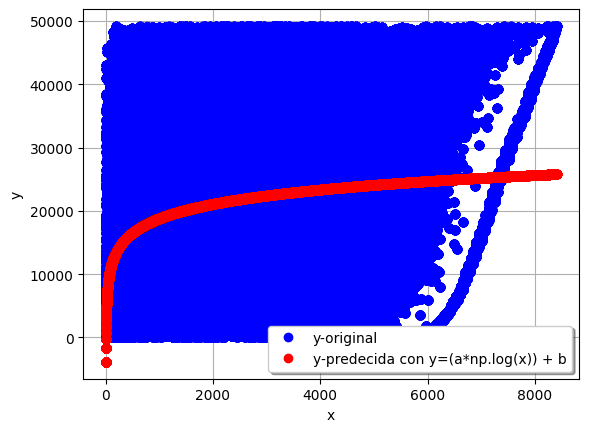

In [584]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_log,'bo', label="y-predecida con y=(a*np.log(x)) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [585]:
R2_Modelo_log = r2_score(y, y_pred_log) 
R2_Modelo_log

0.0905957436053606

In [586]:
R = np.sqrt(abs(R2_Modelo_log))
R

np.float64(0.30099126832079465)

## **Code Site Sampling Operation**

#### **Modelo 1**

In [587]:
Vars_Indep= df_numeric[['SamplingOperations_code']]
Var_Dep= df_numeric['CodeSite_SamplingOperations']

In [588]:
x= Vars_Indep
y= Var_Dep

In [589]:
def func_exp(x, a, b, c):
    return (a*np.exp(-b*x)) + c

In [590]:
parametros_exp, covs= curve_fit(func_exp, df_numeric['SamplingOperations_code'], df_numeric['CodeSite_SamplingOperations'])
parametros_exp

/opt/anaconda3/envs/Analitica/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 6.99263272e+02, -2.55125174e-05,  9.47577316e+02])

In [591]:
y_pred_exp = func_exp(x, *parametros_exp)
y_pred_exp

,SamplingOperations_code
0,2598.281468
1,2432.368259
2,2189.753650
3,1714.438721
4,1971.100170
...,...
1643867,1661.332038
1643868,1992.045033
1643869,2557.070040
1643870,1658.877960


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/2873459608.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/2873459608.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_exp,'bo', label="y-predecida con y=(a*np.exp(-b*x)) + c", color= "red")


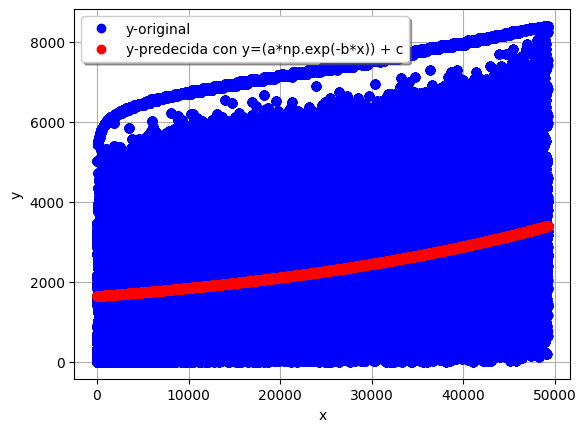

In [592]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_exp,'bo', label="y-predecida con y=(a*np.exp(-b*x)) + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [593]:
R2_Modelo_exp = r2_score(y, y_pred_exp) 
R2_Modelo_exp

0.059083293209571175

In [594]:
R = np.sqrt(abs(R2_Modelo_exp))
R

np.float64(0.24307055191769153)

#### **Modelo 2**

In [595]:
def func_3(x, a, b, c):
    return (a*x) + (b*x) + (c*x)

In [596]:
parametros3, covs= curve_fit(func_3, df_numeric['SamplingOperations_code'], df_numeric['CodeSite_SamplingOperations'])
parametros3

array([-141.39345471,   70.73945515,   70.73945515])

In [597]:
y_pred_3 = func_3(x, *parametros3)
y_pred_3

,SamplingOperations_code
0,2877.033060
1,2522.221485
2,1924.630605
3,309.092838
4,1276.108197
...,...
1643867,68.706287
1643868,1343.959929
1643869,2792.346578
1643870,57.169784


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/368448764.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/368448764.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_3,'bo', label="y-predecida con y=(a*x) + (b*x) + (c*x)", color= "red")


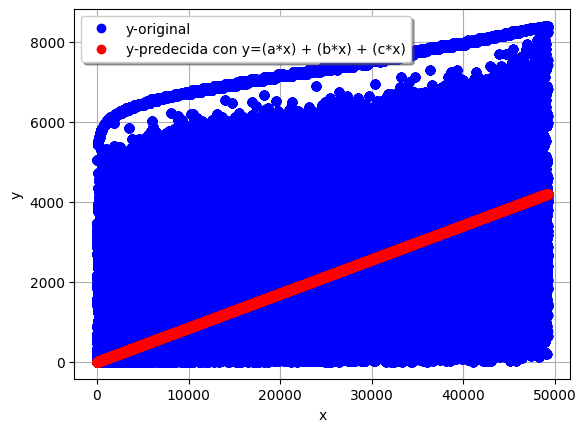

In [598]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_3,'bo', label="y-predecida con y=(a*x) + (b*x) + (c*x)", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [599]:
R2_Modelo3 = r2_score(y, y_pred_3) 
R2_Modelo3

-0.16508603822605972

In [600]:
R = np.sqrt(abs(R2_Modelo3))
R2

np.float64(0.26378654221253683)

## **Date_SamplingOperation**

In [601]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['Date_SamplingOperation']]
Var_Dep= df_numeric['SamplingOperations_code']
x= Vars_Indep
y= Var_Dep

#### **Modelo 1**

In [602]:
def  model_logaritmica (x, a, b, ):
     return (a*np.log(x)) + b

In [603]:
parametros1, covs= curve_fit(model_logaritmica, df_numeric['Date_SamplingOperation'], df_numeric['SamplingOperations_code'])
# Predicciones
y_pred1 = model_logaritmica(x, *parametros1)

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3847109784.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3847109784.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * log(x) + b", color= "red")


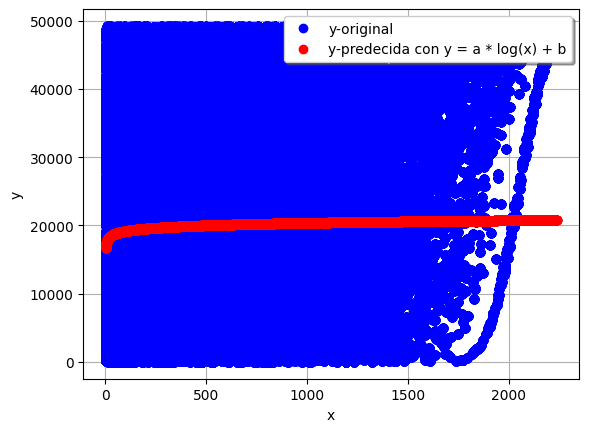

In [604]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * log(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [605]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(R2_Modelo1)
R

np.float64(0.04985456282015911)

#### **Modelo 2**

In [606]:
def model_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

In [607]:
parametros1, covs= curve_fit(model_exponencial, df_numeric['Date_SamplingOperation'], df_numeric['SamplingOperations_code'])
# Predicciones
y_pred1 = model_exponencial(x, *parametros1)

/opt/anaconda3/envs/Analitica/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/286696257.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/286696257.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * exp(-b*x) + c", color= "red")


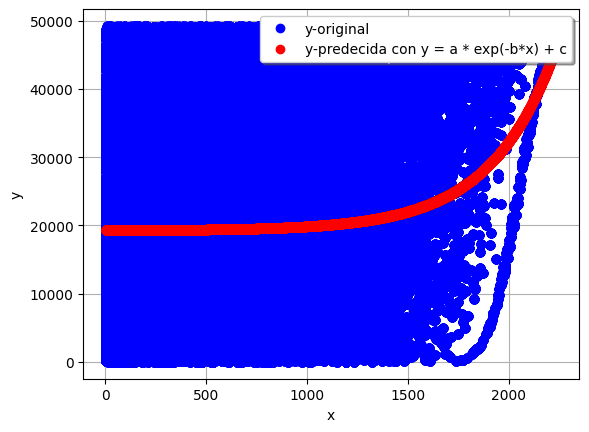

In [608]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * exp(-b*x) + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [609]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(R2_Modelo1)
R

np.float64(0.10801569110207321)

## **Abundance_nbcell**

In [610]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['TaxonName']]
Var_Dep= df_numeric['Abundance_nbcell']
x= Vars_Indep
y= Var_Dep

#### **Modelo 1**

In [611]:
def model_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

In [612]:
parametros1, covs= curve_fit(model_exponencial, df_numeric['TaxonName'], df_numeric['Abundance_nbcell'])
# Predicciones
y_pred1 = model_exponencial(x, *parametros1)

/opt/anaconda3/envs/Analitica/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/286696257.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/286696257.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * exp(-b*x) + c", color= "red")


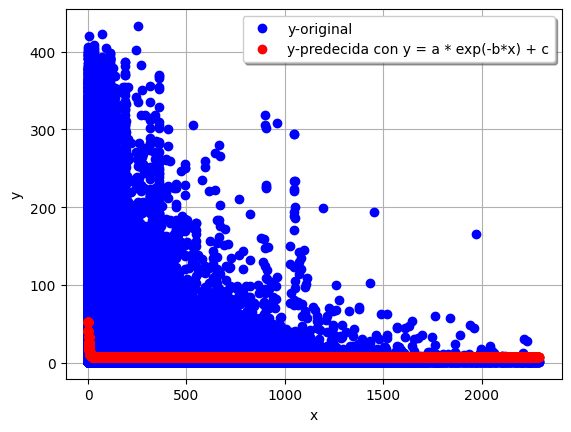

In [613]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * exp(-b*x) + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [614]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(abs(R2_Modelo1))
R

np.float64(0.35169615076133726)

#### **Modelo 2**

In [615]:
def  model_logaritmica (x, a, b, ):
     return (a*np.log(x)) + b

In [616]:
parametros1, covs= curve_fit(model_logaritmica, df_numeric['TaxonName'], df_numeric['Abundance_nbcell'])
# Predicciones
y_pred1 = model_logaritmica(x, *parametros1)

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3847109784.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3847109784.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * log(x) + b", color= "red")


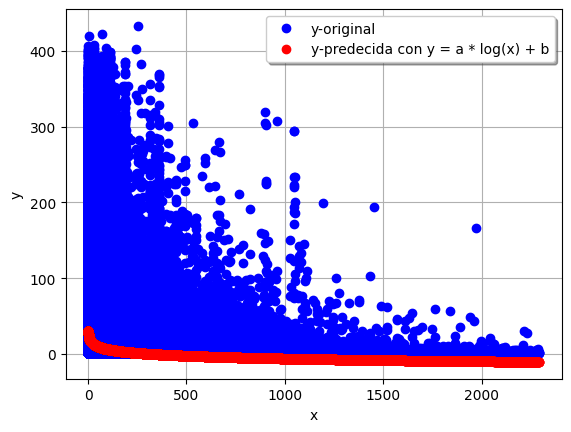

In [617]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * log(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [618]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(abs(R2_Modelo1))
R

np.float64(0.28748175166372847)

## **TotalAbundance_SamplingOperation**

In [619]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['Abundance_nbcell']]
Var_Dep= df_numeric['TotalAbundance_SamplingOperation']
x= Vars_Indep
y= Var_Dep

#### **Modelo 1**

In [620]:
def model_polinomica_grado3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


In [621]:
parametros1, covs= curve_fit(model_polinomica_grado3, df_numeric['Abundance_nbcell'], df_numeric['TotalAbundance_SamplingOperation'])
# Predicciones
y_pred1 = model_polinomica_grado3(x, *parametros1)

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/1722201989.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/1722201989.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*x**3 + b*x**2 + c*x + d", color= "red")


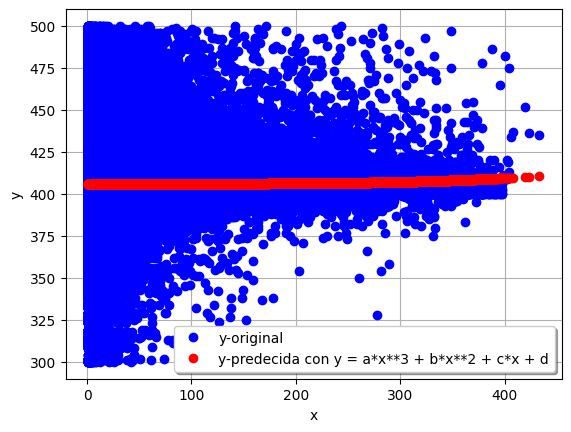

In [622]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*x**3 + b*x**2 + c*x + d", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [623]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(abs(R2_Modelo1))
R

np.float64(0.0074834798541046615)

#### **Modelo 2**

In [624]:
def model_cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

In [625]:
parametros1, covs= curve_fit(model_cuadratica, df_numeric['Abundance_nbcell'], df_numeric['TotalAbundance_SamplingOperation'])
# Predicciones
y_pred1 = model_cuadratica(x, *parametros1)

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3665344720.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3665344720.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*x**2 + b*x + c", color= "red")


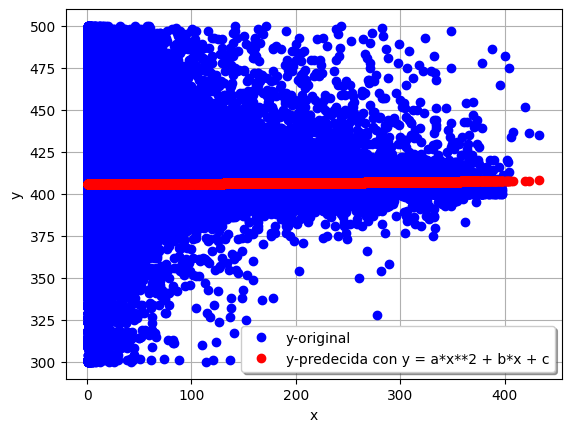

In [626]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [627]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(abs(R2_Modelo1))
R

np.float64(0.0069764410928573745)

## **Abundance_pm**

In [628]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['TaxonCode']]
Var_Dep= df_numeric['Abundance_pm']
x= Vars_Indep
y= Var_Dep

#### **Modelo 1**

In [629]:
def  model_logaritmica (x, a, b, ):
     return (a*np.log(x)) + b

In [630]:
parametros1, covs= curve_fit(model_logaritmica, df_numeric['TaxonCode'], df_numeric['Abundance_pm'])
# Predicciones
y_pred1 = model_logaritmica(x, *parametros1)

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3847109784.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3847109784.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * log(x) + b", color= "red")


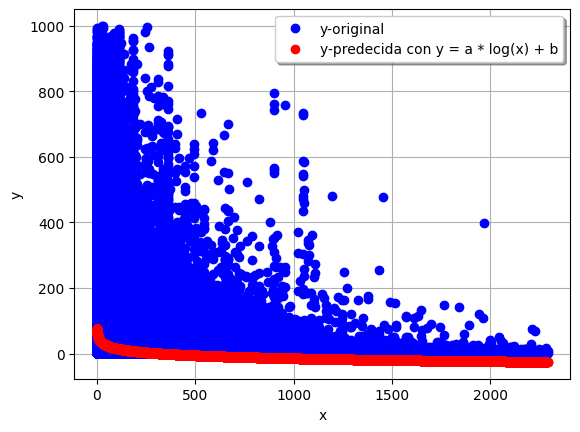

In [631]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a * log(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [632]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(abs(R2_Modelo1))
R

np.float64(0.287391503413876)

#### **Modelo 2**

In [633]:
def model_cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

In [634]:
parametros1, covs= curve_fit(model_cuadratica, df_numeric['TaxonCode'], df_numeric['Abundance_pm'])
# Predicciones
y_pred1 = model_cuadratica(x, *parametros1)

/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3665344720.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/rn/3d02syds5p99hnhh5p4p92jh0000gn/T/ipykernel_15448/3665344720.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*x**2 + b*x + c", color= "red")


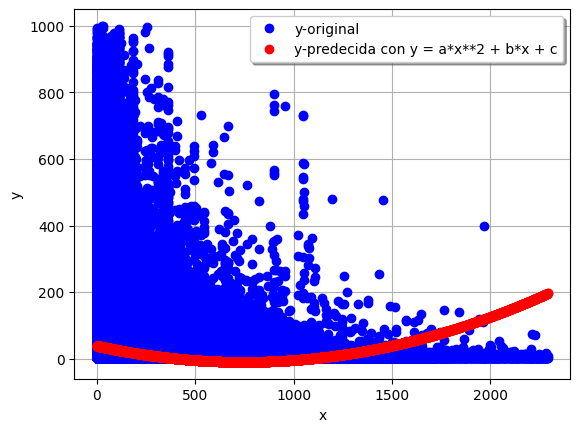

In [635]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [636]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 
R = np.sqrt(abs(R2_Modelo1))
R

np.float64(0.16345161217598406)